# Lucy Targets

Select 5 asteroid targets from JPL's Lucy spacecraft and add them to the simulation.

## Build the sim

In [1]:
cd /Users/mariahjones/Desktop/Research/projects/Orbitals/

/Users/mariahjones/Desktop/Research/projects/Orbitals


In [2]:
import rebound
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
sim = rebound.Simulation()
sim.integrator = "mercurius"
sim.ri_mercurius.L = "infinity"
sim.ri_mercurius.r_crit_hill = 3
sim.dt = 1

## Adding Lucy targets

Select 5 asteroid targets from JPL's Lucy spacecraft and add them to the simulation.

In [4]:
# Convert au/days to au/years
vel_x = [0.0, -6.584186332911239E-03,1.361833139322700E-03, -3.176609453266956E-03, 1.106505958060795E-04]
vel_y = [0.0, 4.208054867943963E-03, 5.314892732297496E-03, 2.188750863994737E-03, 3.160539398425530E-03]
vel_z = [0.0, 1.298323287693746E-04, -1.466946539551684E-04, 4.926573452085599E-05, -6.757068282993264E-05]

vel_x = np.array(vel_x) * 365.25636
vel_y = np.array(vel_y) * 365.25636
vel_z = np.array(vel_z) * 365.25636


# Convert mass to integration units
sol_mass = (2 * np.pi)**2 # integration units
sol_gm = (1.33E20) # real units

jup_gm = 1.27E17 
jup_mass = (jup_gm / sol_gm) * sol_mass


sat_gm = 3.79E16
sat_mass = (sat_gm / sol_gm) * sol_mass

ur_gm = 5.79E15 
ur_mass = (ur_gm / sol_gm) * sol_mass

nep_gm = 6.84E15
nep_mass = (nep_gm / sol_gm) * sol_mass


# add particles to the simulation

sim.add(m = sol_mass, x = 0, y = 0, z = 0,
        vx = vel_x[0], vy = vel_y[0], vz = vel_z[0], hash = 'Sun')
sim.add(m = jup_mass, x = 2.559959519433896E+00, y = 4.317254861986015E+00, z =-7.520814690745442E-02,
        vx= vel_x[1], vy= vel_y[1], vz= vel_z[1], hash = 'Jupiter')
sim.add(m = sat_mass, x = 9.241056053800349E+00, y =-2.909785985421069E+00, z =-3.171865429820031E-01,
        vx= vel_x[2], vy= vel_y[2], vz= vel_z[2], hash = 'Saturn')
sim.add(m = ur_mass, x = 1.178746554190535E+01, y = 1.564471912991385E+01, z =-9.472686043780910E-02,
        vx= vel_x[3], vy= vel_y[3], vz= vel_z[3], hash = 'Uranus')
sim.add(m = nep_mass, x = 2.986403735565160E+01, y =-1.304275085444185E+00, z =-6.613439117521470E-01,
        vx= vel_x[4], vy= vel_y[4], vz= vel_z[4], hash = 'Neptune')

In [5]:
# Convert au/days to au/years
vel_x = np.append(vel_x, [-4.787910318140170E-03, -4.490752466622040E-03,-5.061566077016356E-03, -6.921978329380989E-03, 1.720201882234832E-03])
vel_y = np.append(vel_y, [-6.117250969489108E-03, -6.104130925957561E-03, -5.523543906600741E-03, -3.555983684565142E-03, 8.285673540333695E-03])
vel_z = np.append(vel_z, [-1.607348091112789E-04, -1.018925991237289E-04, -6.120420008003242E-04, -9.050671118572943E-04, 1.913885441042937E-03])

vel_x = np.array(vel_x) * 365.25636
vel_y = np.array(vel_y) * 365.25636
vel_z = np.array(vel_z) * 365.25636





# add particles to the simulation

sim.add(x = -4.201536524694033E+00, y = 2.718676637762465E+00, z = 6.884284956765065E-01,
        vx = vel_x[5], vy = vel_y[5], vz = vel_z[5], hash = 'Eurybates')

sim.add(x = -4.343695308089850E+00, y = 2.555361876963556E+00, z = 1.146716525792677E+00,
        vx= vel_x[6], vy= vel_y[6], vz= vel_z[6], hash = 'Polymele')

sim.add(x = -3.992103726537269E+00, y = 3.297493797829746E+00, z = -9.897818491470088E-01,
        vx= vel_x[7], vy= vel_y[7], vz= vel_z[7], hash = 'Leucus')

sim.add(x = -2.310266153292456E+00, y = 4.373182945338368E+00, z = -4.663571003849790E-01,
        vx= vel_x[8], vy= vel_y[8], vz= vel_z[8], hash = 'Orus')

sim.add(x = 4.224857377650168E+00, y = -5.904764895068263E-01, z = -1.368216676274054E+00,
        vx= vel_x[9], vy= vel_y[9], vz= vel_z[9], hash = 'Patroclus')

In [14]:
Nout = 10000  # number of points to display, corresponding to 10^4 years with 1 year time steps
tmax = 10000        # let the simulation run for 80 years
Nplanets = 9

a = np.zeros((Nplanets,Nout))
ecc = np.zeros((Nplanets,Nout))
Omega = np.zeros((Nplanets,Nout))
omega = np.zeros((Nplanets,Nout))
inc = np.zeros((Nplanets, Nout))
f = np.zeros((Nplanets, Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

for i,time in enumerate(times):
    sim.integrate(time)
    # note we use integrate() with the default exact_finish_time=1, which changes the timestep near 
    # the outputs to match the output times we want.  This is what we want for a Fourier spectrum, 
    # but technically breaks WHFast's symplectic nature.  Not a big deal here.
    os = sim.orbits()
    for j in range(Nplanets):
        a[j][i] = os[j].a 
        ecc[j][i] = os[j].e
        Omega[j][i] = os[j].Omega
        omega[j][i] = os[j].omega
        inc[j][i] = os[j].inc
        f[j][i] = os[j].f

In [15]:
inc = (np.array(inc) * 180 / np.pi) # convert from radians to degrees

In [16]:
print(sim.particles[1].a)
orbits = sim.orbits()
for orbit in orbits:
    print(orbit)

5.201992132181778
<rebound.Orbit instance, a=5.201992132181778 e=0.05867305212632365 inc=0.025192113713901055 Omega=2.050572496092866 omega=4.923620807145621 f=0.7020672662315128>
<rebound.Orbit instance, a=9.548229642398855 e=0.020111442773184572 inc=0.040023939785671675 Omega=1.528859355973916 omega=1.457463841531223 f=5.999807644600109>
<rebound.Orbit instance, a=19.193070646698985 e=0.045274479597805554 inc=0.011359293924476837 Omega=1.4844512223854893 omega=1.723618067916581 f=4.146593326483083>
<rebound.Orbit instance, a=30.07527426818348 e=0.01014064615428313 inc=0.031308593342557436 Omega=2.2879241336924836 omega=4.923720499143075 f=3.3524640413145548>
<rebound.Orbit instance, a=5.276197860183306 e=0.08886258187262625 inc=0.11475011310955702 Omega=-0.04178102263904691 omega=1.297120729895564 f=1.3340625713014784>
<rebound.Orbit instance, a=5.1503391937538625 e=0.05536841292939921 inc=0.2019213252877257 Omega=0.07958037773454814 omega=0.5738333340837034 f=1.5295586439456965>
<re

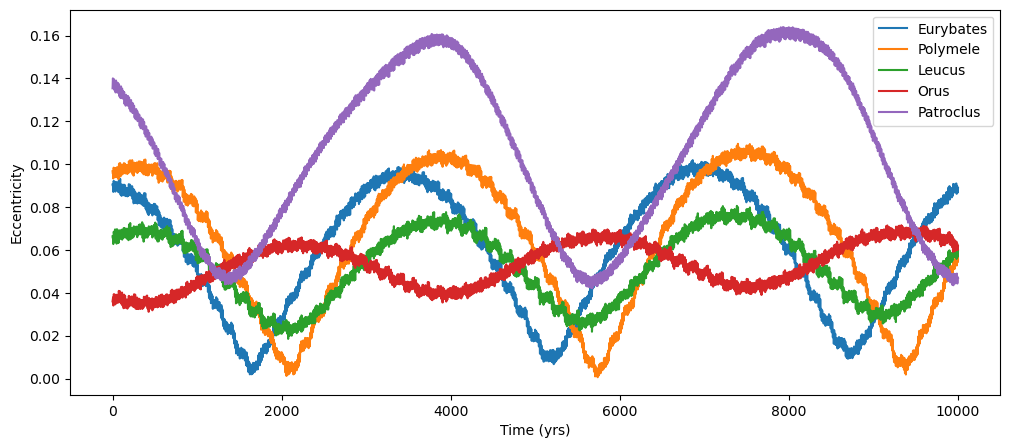

In [17]:
labels = ['Jupiter','Saturn','Uranus','Neptune', 'Eurybates', 'Polymele', 'Leucus', 'Orus', 'Patroclus']
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
#plt.plot(times,ecc[0],label=labels[0])
#plt.plot(times,ecc[1],label=labels[1])
#plt.plot(times,ecc[2],label=labels[2])
#plt.plot(times,ecc[3],label=labels[3])
plt.plot(times,ecc[4],label=labels[4])
plt.plot(times,ecc[5],label=labels[5])
plt.plot(times,ecc[6],label=labels[6])
plt.plot(times,ecc[7],label=labels[7])
plt.plot(times,ecc[8],label=labels[8])

ax.set_xlabel("Time (yrs)")
ax.set_ylabel("Eccentricity")
plt.legend();
plt.savefig('trojans_ecc.png')

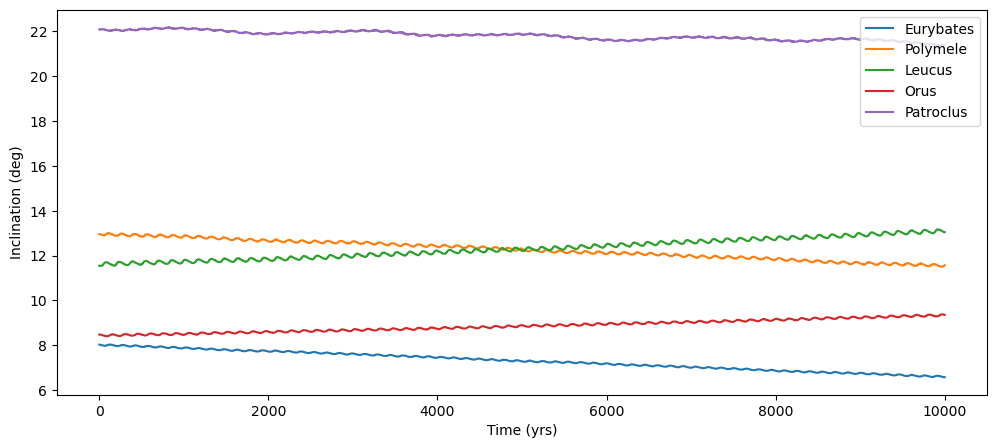

In [18]:
labels = ['Jupiter','Saturn','Uranus','Neptune', 'Eurybates', 'Polymele', 'Leucus', 'Orus', 'Patroclus']
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
#plt.plot(times,inc[0],label=labels[0])
#plt.plot(times,inc[1],label=labels[1])
#plt.plot(times,inc[2],label=labels[2])
#plt.plot(times,inc[3],label=labels[3])
plt.plot(times,inc[4],label=labels[4])
plt.plot(times,inc[5],label=labels[5])
plt.plot(times,inc[6],label=labels[6])
plt.plot(times,inc[7],label=labels[7])
plt.plot(times,inc[8],label=labels[8])

ax.set_xlabel("Time (yrs)")
ax.set_ylabel("Inclination (deg)")
plt.legend();
plt.savefig('trojans_inc.png')

In [19]:
sim.status(showAllFields=False)

---------------------------------
REBOUND version:     	4.4.1
REBOUND built on:    	May  7 2024 19:50:41
Number of particles: 	10
Selected integrator: 	mercurius
Simulation time:     	1.0000000000000000e+04
Current timestep:    	1.000000
---------------------------------
<rebound.particle.Particle object at 0x11ba19550, m=39.47841760435743 x=-21.99280420777493 y=21.12108007189754 z=0.2946222965394379 vx=0.0007393224743902703 vy=0.0020602741118574347 vz=-3.274179155624934e-05>
<rebound.particle.Particle object at 0x11ba1a050, m=0.03769743635904807 x=-21.116474618277593 y=26.00429125587344 z=0.21823911292619522 vx=-2.819290989230455 vy=0.615307596065858 vz=0.05586982711835455>
<rebound.particle.Particle object at 0x11ba19550, m=0.01124986486620411 x=-30.462145500014742 y=25.102294966494387 z=0.6401183974774858 vx=-0.8719642864719084 vy=-1.880203717805237 vz=0.03166883237007033>
<rebound.particle.Particle object at 0x11ba1a050, m=0.0017186469017235304 x=-12.595411685268887 y=38.3604181290